Haojie Pan
Daniel Walsh
CPSC 483
Prof. Avery
10/10/20

In [42]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [43]:
#question 1

#loading the dataset direclty from sklearn
boston = datasets.load_boston()

#print(boston.DESCR)
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target
target = pd.DataFrame(boston.target, columns=['MEDV'])
print(bos.head())
print(target.head())
print(bos.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.1

In [44]:
#question 2
x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print(x_train.head())

         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     16.9  362.25   7.83  
423     20.2    2.52  23.29  
19      21.0  390.95  11.28  


(404,)
(404,)


Text(0, 0.5, '"House prices in $1000"')

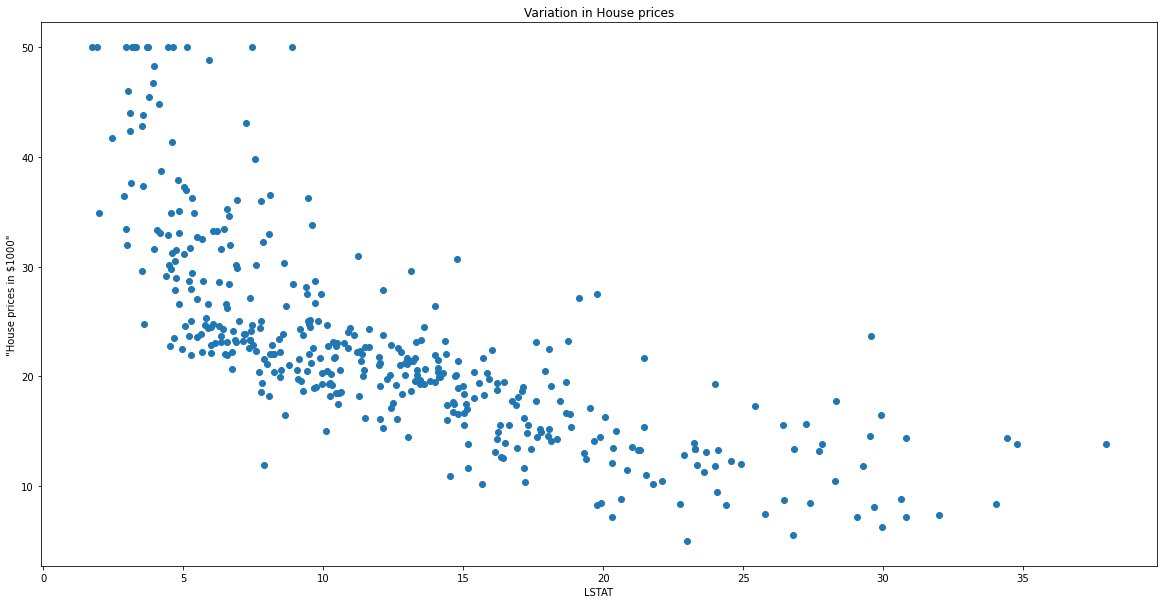

In [45]:
#question 3
x = x_train['LSTAT']
y = y_train
print(x.shape)
print(y.shape)

plt.figure(figsize=(20, 10))
plt.scatter(x, y, marker='o')
plt.title('Variation in House prices')
plt.xlabel('LSTAT')
plt.ylabel('"House prices in $1000"')

Looks like linear

In [46]:
#question 4
import numpy as np

x = np.array(x).reshape(404,1)
x1 = np.hstack((np.ones_like(x),x))
x1 = np.array(x1).reshape(404,2)
#print(x1)
print(x1.shape)

t1 = np.array(y)
print(y.shape)

XX = np.dot(x1.T,x1)
invXX = np.linalg.inv(XX)
Xt = np.dot(x1.T,t1)
w = np.dot(invXX,Xt)
print(w)

(404, 2)
(404,)
[34.83694982 -0.9665309 ]


t = 34.83694982 - 0.9665309 * x

Text(0, 0.5, '"House prices in $1000"')

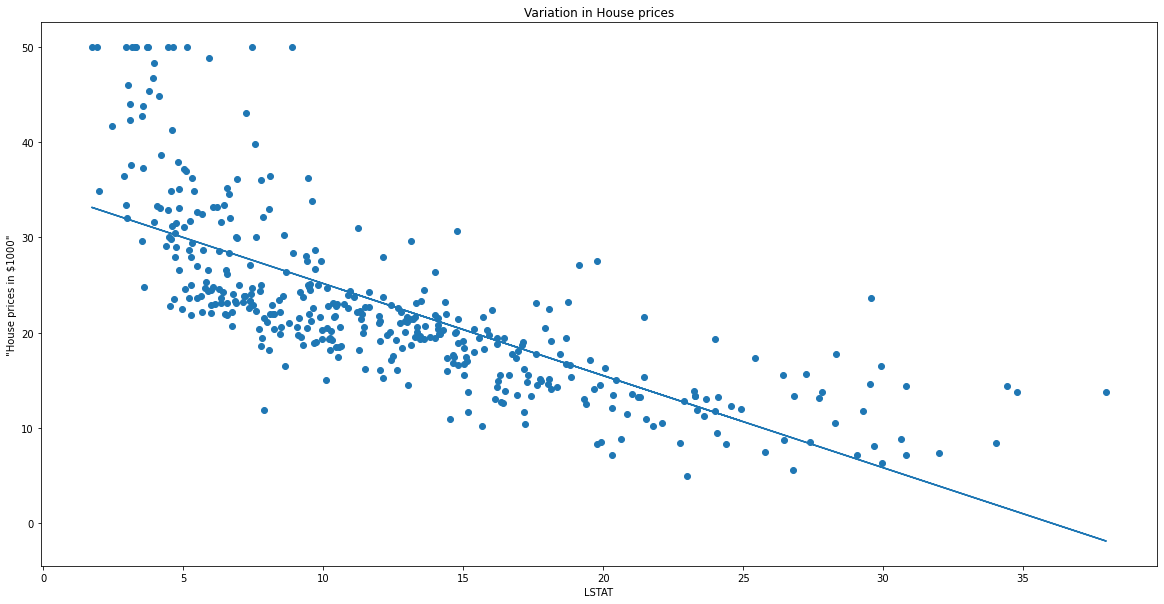

In [47]:
#question 5
x = x_train['LSTAT']
y = y_train
t_predict = 34.83694982 - 0.9665309 * x
plt.figure(figsize=(20, 10))
plt.scatter(x, y, marker='o')
plt.plot(x,t_predict)
plt.title('Variation in House prices')
plt.xlabel('LSTAT')
plt.ylabel('"House prices in $1000"')

It fits pretty good.

In [48]:
#question 6
x_test = x_test['LSTAT']
y_test = y_test
t_predict_1 = 34.83694982 - 0.9665309 * x_test
loss = mean_squared_error(y_test, t_predict_1)
print('question 6 testing loss is: ',loss)

question 6 testing loss is:  33.51954917447502


[43.43630251 -2.41566473  0.04597369]
(404,)


Text(0, 0.5, '"House prices in $1000"')

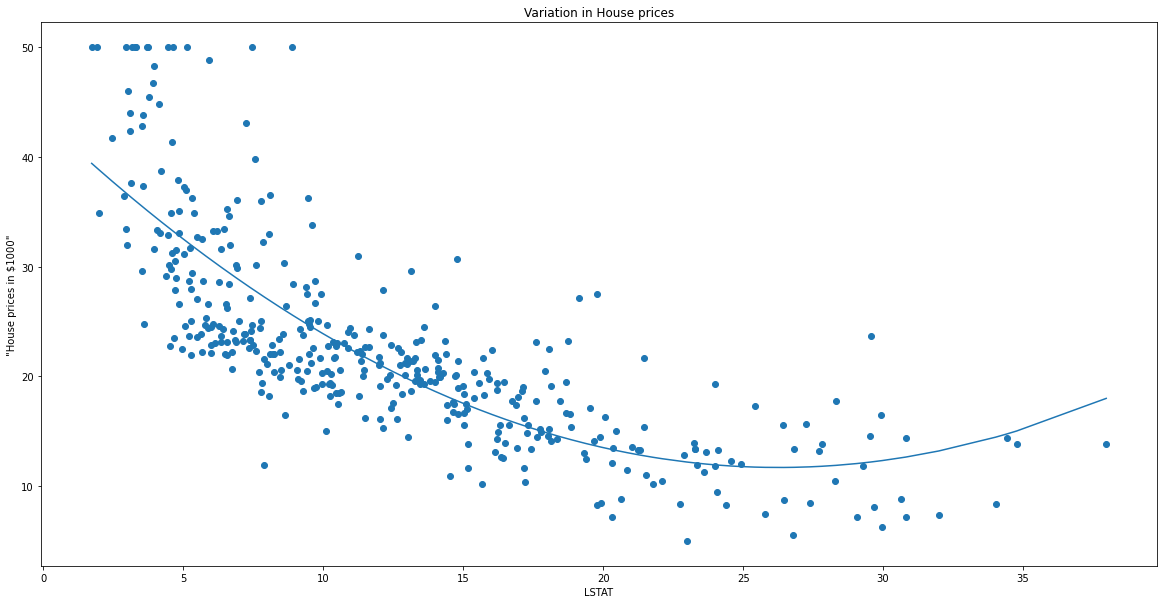

In [59]:
#question 7
x0 = x_train['LSTAT']
y = y_train
x = np.array(x0).reshape(404,1)
#print(x)
x1 = np.hstack((np.ones_like(x),x))
x1 = np.array(x1).reshape(404,2)
x2 = np.zeros((404,), dtype=float)

for i in range(404):
    x2[i] = (x1[i][1])**2
x2 = np.array(x2).reshape(404,1)


x3 = np.hstack((x1,x2))
#print(x3.shape)
#print(x3)

t1 = np.array(y)
#print(y.shape)

XX = np.dot(x3.T,x3)
invXX = np.linalg.inv(XX)
Xt = np.dot(x3.T,t1)
w = np.dot(invXX,Xt)
print(w)

x_sort = np.sort(x0)
t_predict = 43.43630251 -2.41566473 * x_sort + 0.04597369 * x_sort**2
print(t_predict.shape)
plt.figure(figsize=(20, 10))
plt.scatter(x, y, marker='o')
plt.plot(x_sort,t_predict)
plt.title('Variation in House prices')
plt.xlabel('LSTAT')
plt.ylabel('"House prices in $1000"')


In [50]:
x0 = np.array(x_test).reshape(-1,1)
x1 = np.hstack((np.ones_like(x0),x0))
x1 = np.array(x1).reshape(-1,2)
x2 = np.zeros_like(x0)

for i in range(x2.size):
    x2[i] = (x1[i][1])**2
x2 = np.array(x2).reshape(x2.size,1)
x3 = np.hstack((x1,x2))

t_predict_2 = w.dot(x3.T)

loss = mean_squared_error(y_test, t_predict_2)

print('question 7 testing loss is: ',loss)

(404, 1)
(102, 1)
(102, 3)
(102,)
question 7 testing loss is:  27.362831478640647


Quadratic polynomial does a better job to fit the data with lower MSE. 

Repeat experiment (4) with all 13 input features as X and using np.linalg.solve(). 
(See the Appendix to Linear regression in vector and matrix format for details.) 
Does adding additional features improve the performance on the test set compared to using only LSTAT?

In [51]:
# question 8
x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#print(x_train.head())

x0 = x_train
y0 = y_train

x4 = np.ones((404,), dtype=float)
x4 = np.array(x4).reshape(404,1)
x1 = np.hstack((x4,x0))
t1 = np.array(y0)

XX = np.dot(x1.T,x1)
invXX = np.linalg.inv(XX)
Xt = np.dot(x1.T,t1)
w = np.linalg.lstsq(XX,Xt,rcond=None)
print(w[0])

(404, 14)
[ 3.02467510e+01 -1.13055924e-01  3.01104641e-02  4.03807204e-02
  2.78443820e+00 -1.72026334e+01  4.43883520e+00 -6.29636221e-03
 -1.44786537e+00  2.62429736e-01 -1.06467863e-02 -9.15456240e-01
  1.23513347e-02 -5.08571424e-01]


In [52]:

x0 = np.array(y_test).reshape(-1,1)
x1 = np.hstack((np.ones_like(x0),x_test))

t_predict_3 = w[0].dot(x1.T)

loss = mean_squared_error(y_test, t_predict_3)
print('question 8 testing loss is: ', loss)


question 8 testing loss is:  24.29111947516431


Much better result. 

In [53]:
# question 9 
x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

x_train_square = x_train **2
x_train_with_squares = np.hstack((x_train, x_train_square))
X_ones = np.ones_like(y_train).reshape(-1,1)
x_train_final = np.hstack((X_ones,x_train_with_squares))


(404, 13)
(404, 13)
(404, 26)
(404, 1)
(404, 27)


In [54]:
t1 = np.array(y_train)
#print(y_train.shape)

XX = np.dot(x_train_final.T,x_train_final)
Xt = np.dot(x_train_final.T,t1)
w1 = np.linalg.solve(XX,Xt)
#print(w1)

x_test_square = x_test**2
x_test_with_squares = np.hstack((x_test, x_test_square))
x_ones = np.ones_like(y_test).reshape(-1,1)
x_test_final = np.hstack((x_ones, x_test_with_squares))

t_predict_4 = w1.dot(x_test_final.T)
loss = mean_squared_error(y_test, t_predict_4)
#print(loss)

w = np.linalg.lstsq(XX,Xt,rcond=None)
#print(w[0])
t_predict_5 = w[0].dot(x_test_final.T)
loss = mean_squared_error(y_test, t_predict_5)
print('question 9 testing loss is: ', loss)

question 9 testing loss is:  16.58380929794393


It improves the performance.

In [55]:
#question 10

# question 8 training mse
x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#print(x_train.head())

x0 = x_train
y0 = y_train

x4 = np.ones((404,), dtype=float)
x4 = np.array(x4).reshape(404,1)
x1 = np.hstack((x4,x0))
#print(x1.shape)
t1 = np.array(y0)

XX = np.dot(x1.T,x1)
invXX = np.linalg.inv(XX)
Xt = np.dot(x1.T,t1)
w = np.linalg.lstsq(XX,Xt,rcond=None)
#print(w[0])

x0 = np.array(y_train).reshape(-1,1)
x1 = np.hstack((np.ones_like(x0),x_train))

t_predict_3 = w[0].dot(x1.T)

loss = mean_squared_error(y_train, t_predict_3)
print('question 8 training loss is: ', loss)


question 8 training loss is:  21.641412753226312


In [56]:
# question 9 training MSE
x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

x_train_square = x_train **2
x_train_with_squares = np.hstack((x_train, x_train_square))
X_ones = np.ones_like(y_train).reshape(-1,1)
x_train_final = np.hstack((X_ones,x_train_with_squares))

t1 = np.array(y_train)

XX = np.dot(x_train_final.T,x_train_final)
Xt = np.dot(x_train_final.T,t1)
w1 = np.linalg.solve(XX,Xt)
#print(w1)

x_train_square = x_train**2
x_train_with_squares = np.hstack((x_train, x_train_square))
x_ones = np.ones_like(y_train).reshape(-1,1)
x_train_final = np.hstack((x_ones, x_train_with_squares))

t_predict_4 = w1.dot(x_train_final.T)
loss = mean_squared_error(y_train, t_predict_4)
#print(loss)

w = np.linalg.lstsq(XX,Xt,rcond=None)
#print(w[0])
t_predict_5 = w[0].dot(x_train_final.T)
loss = mean_squared_error(y_train, t_predict_5)
print('question 9 training loss is: ',loss)

question 9 training loss is:  17.126173365818705


Answer: question 8 training loss is less than test loss. Question 9 training loss is greater than test loss.
For the same amount of training examples, it is harder for the model to fit with extra features. 
Question 9 is overall performing better.  

In [61]:
#question 11
x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

x_train_square = x_train **2
x_train_cubic = x_train **3
x_train_with_squares = np.hstack((x_train, x_train_square))
x_train_with_2_3 = np.hstack((x_train_with_squares, x_train_cubic))

X_ones = np.ones_like(y_train).reshape(-1,1)
x_train_final = np.hstack((X_ones,x_train_with_2_3))

t1 = np.array(y_train)

XX = np.dot(x_train_final.T,x_train_final)
Xt = np.dot(x_train_final.T,t1)
w = np.linalg.lstsq(XX,Xt,rcond=None)
#print(w[0])

t_predict_6 = w[0].dot(x_train_final.T)
loss = mean_squared_error(y_train, t_predict_6)
print('question 11 training loss is: ',loss)


x_test_square = x_test**2
x_test_cubic = x_test **3
x_test_with_squares = np.hstack((x_test, x_test_square))
x_test_with_2_3 = np.hstack((x_test_with_squares, x_test_cubic))

x_ones = np.ones_like(y_test).reshape(-1,1)
x_test_final = np.hstack((x_ones, x_test_with_2_3))

t_predict_7 = w[0].dot(x_test_final.T)
loss = mean_squared_error(y_test, t_predict_7)
print('question 11 testing loss is: ', loss)

question 11 training loss is:  20.439292943448148
question 11 testing loss is:  20.01278465766171


Answer: This model's both training and testing performs better than one order polynomal worse than two order polynomal model.
This model has relative high training loss. It supose to have a lower training loss as a more flexiable model. 
My guess is the training data is very limited. Or the x^3 is no-related to the y value. 
    